In [1]:
# Importo librerias necesarias para el analisis de datos
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Formateo para que los float tengan 2 decimales
pd.options.display.float_format='{:.2f}'.format

In [3]:
df = pd.read_csv('mcdonaldata.csv')
df

,Unnamed: 0,item,servesize,calories,protien,totalfat,satfat,transfat,cholestrol,carbs,sugar,addedsugar,sodium,menu
0,0,McVeggie Burger,168,402,10.24,13.83,5.34,0.16,2.49,56.54,7.90,4.49,706.13,regular
1,1,McAloo Tikki Burger,146,339,8.50,11.31,4.27,0.20,1.47,5.27,7.05,4.07,545.34,regular
2,2,McSpicy Paneer Burger,199,652,20.29,39.45,17.12,0.18,21.85,52.33,8.35,5.27,1074.58,regular
3,3,Spicy Paneer Wrap,250,674,20.96,39.10,19.73,0.26,40.93,59.27,3.50,1.08,1087.46,regular
4,4,American Veg Burger,177,512,15.30,23.45,10.51,0.17,25.24,56.96,7.85,4.76,1051.24,regular
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136,136,Tomato Ketchup Sachets,8,11.23,0.08,23.45,0.38,0.25,0.08,2.63,2.33,1.64,414.71,condiments
137,137,Maple Syrup,3,86.4,0.00,0.00,0.00,0.40,0.30,21.60,16.20,5.34,71.05,condiments
138,138,Cheese Slice,14,51.03,3.06,3.99,0.00,0.00,13.43,0.72,0.54,0.00,15.00,condiments
139,139,Sweet Corn,40,45.08,1.47,1.00,2.89,0.01,2.00,7.55,2.54,0.00,178.95,condiments


In [4]:
# Tamaño del dataframe
df.shape

(141, 14)

In [5]:
# Tipo de dato de cada variable
df.dtypes

Unnamed: 0      int64
item           object
servesize      object
calories       object
protien       float64
totalfat      float64
satfat        float64
transfat      float64
cholestrol    float64
carbs         float64
sugar         float64
addedsugar    float64
sodium        float64
menu           object
dtype: object

In [6]:
df['calories'] = df['calories'].astype(float)

In [7]:
# Borro la columna que no necesito
df.drop(columns='Unnamed: 0', inplace=True)

In [8]:
# Busco valores faltantes, nulos o repetidos para hacer limpieza de datos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141 entries, 0 to 140
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   item        141 non-null    object 
 1   servesize   141 non-null    object 
 2   calories    141 non-null    float64
 3   protien     141 non-null    float64
 4   totalfat    141 non-null    float64
 5   satfat      141 non-null    float64
 6   transfat    141 non-null    float64
 7   cholestrol  141 non-null    float64
 8   carbs       141 non-null    float64
 9   sugar       141 non-null    float64
 10  addedsugar  141 non-null    float64
 11  sodium      141 non-null    float64
 12  menu        141 non-null    object 
dtypes: float64(10), object(3)
memory usage: 14.4+ KB


In [9]:
df.duplicated().sum()

0

In [10]:
df.isnull().sum()

item          0
servesize     0
calories      0
protien       0
totalfat      0
satfat        0
transfat      0
cholestrol    0
carbs         0
sugar         0
addedsugar    0
sodium        0
menu          0
dtype: int64

# EDA

In [11]:
df.columns

Index(['item', 'servesize', 'calories', 'protien', 'totalfat', 'satfat',
       'transfat', 'cholestrol', 'carbs', 'sugar', 'addedsugar', 'sodium',
       'menu'],
      dtype='object')

In [12]:
# Los 10 productos con mas calorias ordenador de menor a mayor
df_top10calories = df[['item', 'calories']].head(10).sort_values('calories')
df_top10calories

,item,calories
7,Pizza Puff,228.00
1,McAloo Tikki Burger,339.00
9,FILLET-O-FISH Burger,348.00
6,Green Chilli Aloo Naan p,356.00
8,Mc chicken Burger,400.00
0,McVeggie Burger,402.00
4,American Veg Burger,512.00
2,McSpicy Paneer Burger,652.00
3,Spicy Paneer Wrap,674.00
5,Veg Maharaja Mac,832.00


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Pizza Puff\xa0'),
  Text(1, 0, 'McAloo Tikki Burger'),
  Text(2, 0, 'FILLET-O-FISH Burger\xa0'),
  Text(3, 0, 'Green Chilli Aloo Naan p'),
  Text(4, 0, 'Mc chicken Burger\xa0'),
  Text(5, 0, 'McVeggie Burger'),
  Text(6, 0, 'American Veg Burger'),
  Text(7, 0, 'McSpicy\x99 Paneer Burger'),
  Text(8, 0, 'Spicy Paneer Wrap'),
  Text(9, 0, 'Veg Maharaja Mac\xa0')])

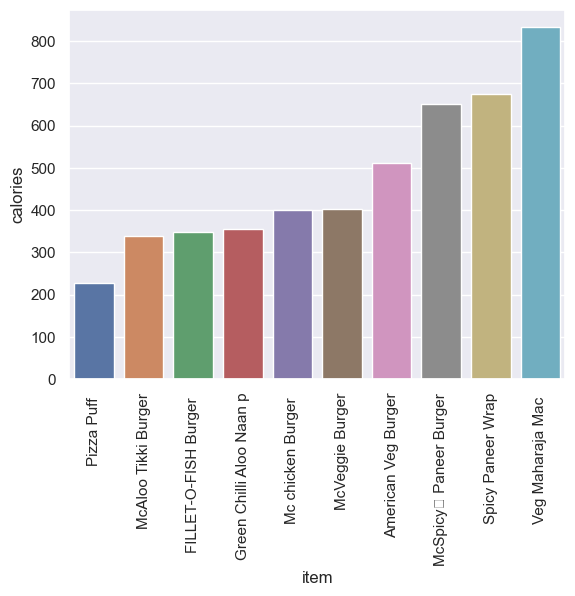

In [13]:
sns.set(style='darkgrid')
sns.barplot(x=('item'),y=('calories'),data=df_top10calories)
plt.xticks(rotation=90)


In [14]:
# Agrupo para ver la cantidad de items por cada menu
df.groupby('menu')['item'].count()

menu
beverage      17
breakfast      8
condiments     9
dessert       12
gourmet       11
mccafe        48
regular       36
Name: item, dtype: int64

In [15]:
# Calculo la mediana de cada valor por tipo de menu
df.groupby('menu').median()


,calories,protien,totalfat,satfat,transfat,cholestrol,carbs,sugar,addedsugar,sodium
menu,,,,,,,,,,
beverage,145.16,0.00,0.00,0.00,0.00,0.00,32.37,32.37,32.37,34.74
breakfast,282.45,10.86,12.06,7.02,0.17,45.39,28.94,2.60,0.75,682.78
condiments,51.03,0.51,0.49,0.15,0.04,0.25,7.24,2.54,1.34,71.05
dessert,178.79,2.96,5.46,3.66,0.10,6.12,31.09,23.05,15.64,90.81
gourmet,524.69,22.44,29.30,11.56,0.19,48.74,46.00,7.90,3.84,1229.86
mccafe,158.92,3.77,4.42,3.17,0.23,9.39,22.72,18.05,1.20,87.92
regular,345.00,11.27,14.50,5.95,0.15,24.95,38.70,3.37,0.35,564.19


In [16]:
#filtro las bebidas y ordeno por caloras de mayor a menor
df[df['menu'] == 'beverage'].sort_values('calories', ascending=False)

,item,servesize,calories,protien,totalfat,satfat,transfat,cholestrol,carbs,sugar,addedsugar,sodium,menu
120,Large Fanta Orange,544,256.88,0.00,0.00,0.00,0.00,0.00,64.22,64.22,64.22,25.15,beverage
126,Large Sprite,544,237.12,0.00,0.00,0.00,0.00,0.00,59.28,59.28,59.28,44.53,beverage
117,Large Coca-Cola,544,217.36,0.00,0.00,0.00,0.00,0.00,54.34,54.34,54.34,55.53,beverage
123,Large Thums-up,544,197.60,0.00,0.00,0.00,0.00,0.00,49.40,49.40,49.40,2.02,beverage
119,Medium Fanta Orange,394,178.88,0.00,0.00,0.00,0.00,0.00,44.71,44.72,44.72,110.16,beverage
125,Medium Sprite,394,165.12,0.00,0.00,0.00,0.00,0.00,41.28,41.28,41.28,4.00,beverage
128,Fanta Float,286.79,151.56,1.52,1.75,1.28,0.25,4.70,27.74,31.43,27.74,47.09,beverage
116,Medium Coca-Cola,394,151.36,0.00,0.00,0.00,0.00,0.00,37.84,37.84,37.84,41.99,beverage
129,Sprite Float,286.79,145.16,1.52,1.75,1.28,0.25,4.70,26.14,29.83,26.14,24.75,beverage
127,Coke Float,286.79,138.76,1.52,1.75,1.28,0.05,4.70,24.54,28.23,24.54,66.61,beverage


In [17]:
#filtro por los desayunos y ordeno de mayor a menor
df[df['menu'] == 'breakfast'].sort_values('calories', ascending=False)

,item,servesize,calories,protien,totalfat,satfat,transfat,cholestrol,carbs,sugar,addedsugar,sodium,menu
42,Hot Cake with maple syrup,142,432.98,8.60,14.02,7.11,0.32,28.14,68.01,25.72,13.50,615.74,breakfast
36,Veg McMuffin,119,309.35,10.22,11.78,7.29,0.18,25.31,38.86,3.02,0.75,804.63,breakfast
40,Sausage Mc Muffin with egg,157,290.42,22.46,15.94,8.08,0.22,264.80,28.87,2.61,0.75,804.04,breakfast
41,Egg McMuffin,112,283.46,14.05,12.31,6.92,0.17,233.30,28.12,2.38,0.75,519.31,breakfast
39,Sausage Mc Muffin,112,281.44,16.25,10.81,6.04,0.17,53.02,28.62,2.38,0.75,742.60,breakfast
38,Spicy Egg McMuffin,123.2,278.27,11.49,11.81,3.43,0.11,212.61,31.37,2.63,1.05,773.60,breakfast
37,Double Cheese McMuffin,100,273.78,9.58,12.82,8.84,0.21,37.75,29.00,2.59,0.75,622.95,breakfast
43,Hash Brown,64,140.29,1.93,7.32,3.42,0.06,0.64,15.63,0.32,0.00,275.26,breakfast


In [20]:
regular = df[df['menu'] == 'regular'].sort_values('calories', ascending=False)
regular

,item,servesize,calories,protien,totalfat,satfat,transfat,cholestrol,carbs,sugar,addedsugar,sodium,menu
5,Veg Maharaja Mac,306,832.00,24.17,37.94,16.83,0.28,36.19,93.84,11.52,6.92,1529.22,regular
18,Ghee Rice with Mc Spicy Fried Chicken 1 pc,325,720.00,26.91,29.20,5.08,0.30,31.32,77.47,0.58,0.35,2399.49,regular
12,Chicken Maharaja Mac,296,689.00,34.00,36.69,10.33,0.25,81.49,55.39,7.48,6.14,1854.71,regular
3,Spicy Paneer Wrap,250,674.00,20.96,39.10,19.73,0.26,40.93,59.27,3.50,1.08,1087.46,regular
2,McSpicy Paneer Burger,199,652.00,20.29,39.45,17.12,0.18,21.85,52.33,8.35,5.27,1074.58,regular
11,Spicy Chicken Wrap,257,567.00,23.74,26.89,12.54,0.27,87.63,57.06,8.92,1.08,1152.38,regular
4,American Veg Burger,177,512.00,15.30,23.45,10.51,0.17,25.24,56.96,7.85,4.76,1051.24,regular
10,Mc Spicy Chicken Burger,186,451.00,21.46,19.36,7.63,0.18,66.04,46.08,2.52,4.49,928.52,regular
28,Large Fries,154,449.00,6.76,20.77,9.95,0.10,1.54,54.16,0.77,0.00,306.29,regular
13,American Chicken Burger,165,446.00,20.29,22.94,7.28,0.15,47.63,38.54,5.08,4.76,1132.30,regular


In [19]:
# Grafico un boxplot para resumir datos
fig = px.box(regular, y="calories")
fig.show()

### Este grafico nos muestra que la mediana de calorias de los productos de la clase regular esta en 345. El producto "Veg Maharaja Mac" sobrepasa ampliamente este valor con 832 calorias.
